In [57]:
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import fbprophet
def mean_absolute_percentage_error(true,pred):
    return np.mean(np.abs((np.array(true) - np.array(pred)) / np.array(true))) * 100

In [167]:
combined_df = pd.read_pickle('../scripts/data/shifted/combined_df_stripped_swe4_shifted.pickle')
train = combined_df['Spot'][:-(24*10*7)]
test = combined_df['Spot'][-(24*10*7):]
train = train['2017':'2018']
spot = pd.DataFrame(columns=['ds','y'])
spot['y'] = train
spot['ds'] = train.index
spot.index = pd.RangeIndex(len(spot.index))
result_df = pd.DataFrame(index=test.index)
result_df['Actual'] = test

best_mape_proph = 100
best_params_proph = tuple()
params = {
    'changepoint_prior_scale': [0.05],
    'n_changepoints' : [24,48,360,720],
    'holidays_prior_scale':[1,10,40],
    'seasonality_prior_scale': [1,10,40],
    'seasonality_mode':['additive','multiplicative']
}
combos = itertools.product(*(params[parameter] for parameter in params))
counter = 1
for x in combos:
    if counter % 10 == 0:
        print(f"Grid search at {counter}")
    prophet = fbprophet.Prophet(changepoint_prior_scale=x[0],n_changepoints=x[1],holidays_prior_scale=x[2],seasonality_prior_scale=x[3],seasonality_mode=x[4])
    prophet.add_country_holidays(country_name='FI')
    prophet.fit(spot)
    forecast = prophet.make_future_dataframe(periods=len(test),freq='H')
    forecast = prophet.predict(forecast)
    result_df['Forecast'] = forecast['yhat']
    mape = mean_absolute_percentage_error(result_df['Actual'],result_df['Forecast'])
    if mape < best_mape:
        best_mape_proph = mape
        best_params_proph = x
    counter += 1

/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 10


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 20


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 30


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 40


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 50


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 60


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with y

Grid search at 70


/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/joni/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [168]:
print(best_mape_proph,best_params_proph)

100 ()


MAE 6.15884905594229 RMSE 8.904559366759088 MAPE 11.835513341918553


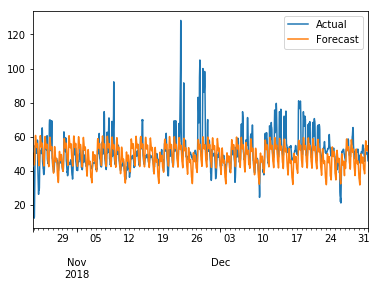

In [56]:
forecast.set_index(['ds'],inplace=True)
result_df = pd.DataFrame(index=test.index)
result_df['Actual'] = test
result_df['Forecast'] = forecaThe chst['yhat']
result_df.plot()
print(f"MAE {mean_absolute_error(result_df['Actual'],result_df['Forecast'])} RMSE {np.sqrt(mean_squared_error(result_df['Actual'],result_df['Forecast']))} MAPE {mean_absolute_percentage_error(result_df['Actual'],result_df['Forecast'])}")

# XGBoost

In [173]:
combined_df = pd.read_pickle('../scripts/data/shifted/combined_df_stripped_swe4_shifted.pickle')
t24_df = pd.read_pickle('../scripts/data/shifted/combined_df_stripped_T24.pickle')
combined_df['Spot T-168'] = t24_df['Spot T-168']
print(combined_df['Spot T-168'])
columns_to_drop = ['Spot MA T-24','Spot STD T-24','Spot Rolling Min T-24','Spot Rolling Max T-24']
combined_df.drop(columns=columns_to_drop,inplace=True)
combined_df2 = combined_df['2015-02':'2018-12']
columns_to_shift = [x for x in combined_df2.columns if 'Spot' not in x]
combined_df2[columns_to_shift] = combined_df2[columns_to_shift].shift(24)
combined_df.drop(columns=columns_to_shift,inplace=True)
combined_df[columns_to_shift] = combined_df2[columns_to_shift]
combined_df.dropna(inplace=True)
train_x, train_y = combined_df.drop(columns=['Spot'])[:-(24*10*7)], combined_df['Spot'][:-(24*10*7)]
test_x, test_y = combined_df.drop(columns=['Spot'])[-(24*10*7):], combined_df['Spot'][-(24*10*7):]

test_df = pd.DataFrame(index=test_y.index, data={'Actual' : test_y})

2015-01-01 00:00:00    29.47
2015-01-01 01:00:00    29.29
2015-01-01 02:00:00    29.43
2015-01-01 03:00:00    29.00
2015-01-01 04:00:00    28.49
2015-01-01 05:00:00    28.40
2015-01-01 06:00:00    28.51
2015-01-01 07:00:00    29.10
2015-01-01 08:00:00    29.56
2015-01-01 09:00:00    33.25
2015-01-01 10:00:00    34.99
2015-01-01 11:00:00    37.68
2015-01-01 12:00:00    30.54
2015-01-01 13:00:00    30.29
2015-01-01 14:00:00    30.17
2015-01-01 15:00:00    30.59
2015-01-01 16:00:00    45.62
2015-01-01 17:00:00    45.63
2015-01-01 18:00:00    45.65
2015-01-01 19:00:00    45.64
2015-01-01 20:00:00    45.63
2015-01-01 21:00:00    38.93
2015-01-01 22:00:00    30.55
2015-01-01 23:00:00    32.77
2015-01-02 00:00:00    30.46
2015-01-02 01:00:00    30.01
2015-01-02 02:00:00    30.00
2015-01-02 03:00:00    29.69
2015-01-02 04:00:00    29.51
2015-01-02 05:00:00    29.51
                       ...  
2018-12-30 16:00:00    52.80
2018-12-30 17:00:00    53.00
2018-12-30 18:00:00    53.11
2018-12-30 19:

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [159]:
import itertools
best_mape = 100
best_params = tuple()
params = {
    'n_estimators': [100,500,1000],
    'max_depth':[9,10,11],
    'min_child_weight': [5,6,7],
    'learning_rate':[0.01,0.1,0.5],
    'subsample': [0.7,0.8,0.9,1],
    'colsample_bytree': [0.7,0.8,0.9,1]
}
combos = itertools.product(*(params[parameter] for parameter in params))
for x in combos:
    xgboost = xgb.XGBRegressor(n_jobs=-1,n_estimators=x[0],max_depth=x[1],min_child_weight=x[2],learning_rate=x[3],subsample=x[4],colsample_bytree=x[5],objective='reg:linear')
    xgboost.fit(train_x, train_y,
                eval_set=[(train_x,train_y),(test_x,test_y)],
                early_stopping_rounds=50,
                verbose=False)
    test_df['Forecast'] = xgboost.predict(test_x)
    mape = mean_absolute_percentage_error(test_df['Actual'],test_df['Forecast'])
    if mape < best_mape:
        best_mape = mape
        best_params = x

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [160]:
print(best_mape)
print(best_params)

11.81043856844817
(100, 9, 7, 0.1, 0.7, 0.7)


# Fit XGB using best parameters

In [171]:
xgboost = xgb.XGBRegressor(n_jobs=-1,n_estimators=100,max_depth=9,min_child_weight=7,learning_rate=0.1,subsample=0.7,colsample_bytree=0.7,objective='reg:linear')
xgboost.fit(train_x, train_y,
            eval_set=[(train_x,train_y),(test_x,test_y)],
            early_stopping_rounds=50,
            verbose=False)

/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/joni/anaconda3/envs/ml/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

MAE 6.3132484295254665 RMSE 9.257304456363766 MAPE 11.81077774747502


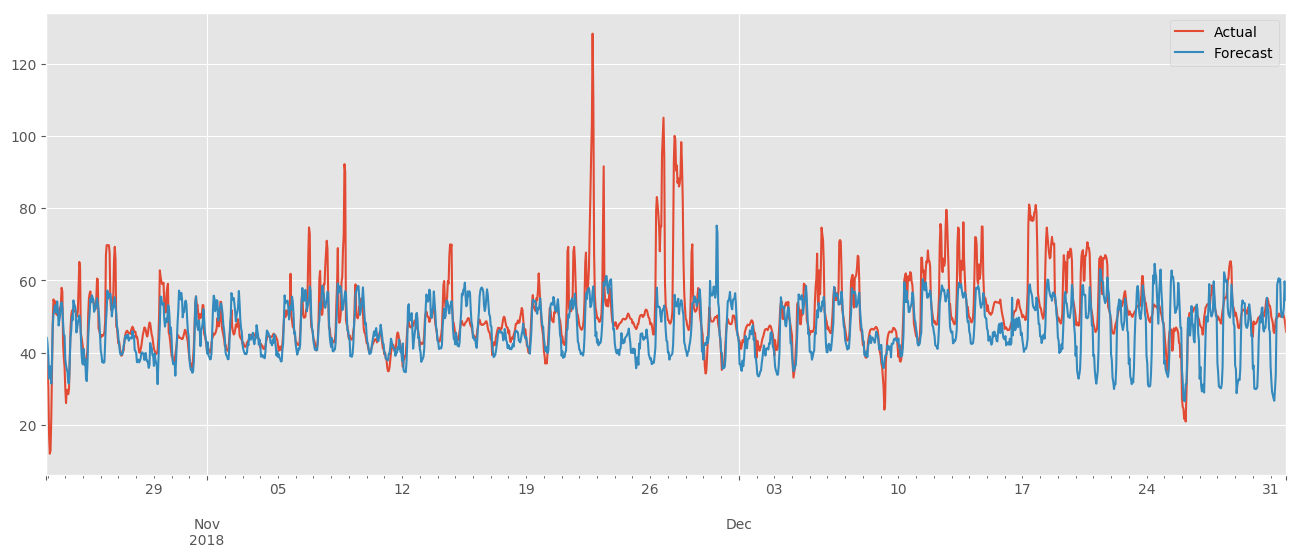

In [172]:
plt.style.use('ggplot')
test_df['Forecast'] = xgboost.predict(test_x)
test_df.plot(figsize=(16,6))
print(f"MAE {mean_absolute_error(test_df['Actual'],test_df['Forecast'])} RMSE {np.sqrt(mean_squared_error(test_df['Actual'],test_df['Forecast']))} MAPE {mean_absolute_percentage_error(test_df['Actual'],test_df['Forecast'])}")

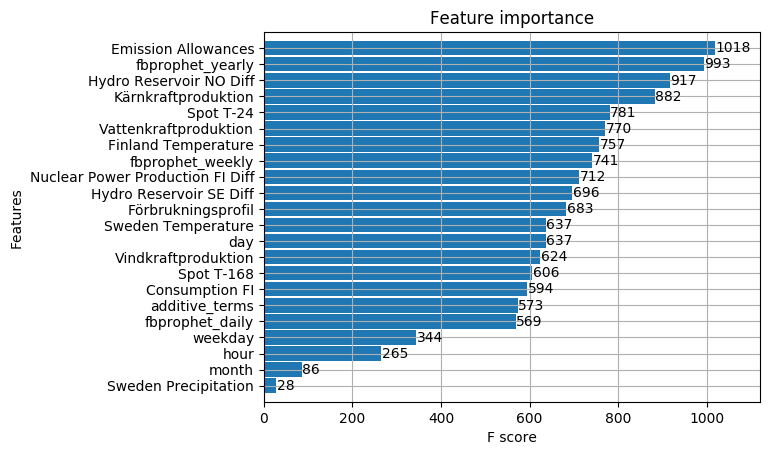

In [174]:
plt.style.use('default')
_ = plot_importance(xgboost, height=0.9)